In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [5]:
data = keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)= data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [21]:
#normlization
train_images = train_images /255
test_images = test_images/255

test_images[0].shape

(28, 28)

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation ="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=7)


Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 8s 133us/sample - loss: 1.0737 - accuracy: 0.6772
Epoch 2/7
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6328 - accuracy: 0.7715
Epoch 3/7
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5578 - accuracy: 0.8003
Epoch 4/7
60000/60000 [==============================] - 7s 117us/sample - loss: 0.5160 - accuracy: 0.8163
Epoch 5/7
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4884 - accuracy: 0.8264
Epoch 6/7
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4686 - accuracy: 0.8351
Epoch 7/7
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4536 - accuracy: 0.8402


In [24]:
prediction = model.predict(test_images)

prediction[0]

array([9.3569861e-07, 2.5874943e-08, 6.4087840e-06, 3.7482134e-06,
       2.1317819e-05, 1.6800852e-01, 1.6373458e-05, 3.5471296e-01,
       3.8769674e-03, 4.7335276e-01], dtype=float32)

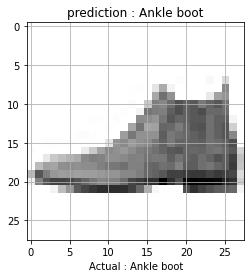

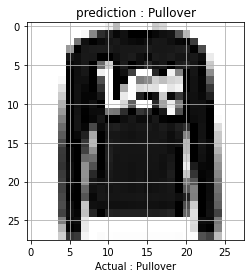

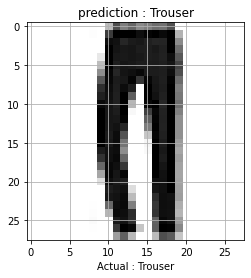

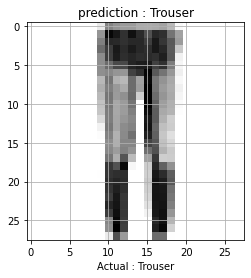

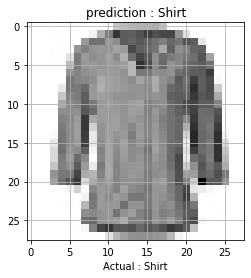

In [26]:
import matplotlib.pyplot as plt 

for i in range(5):
    plt.grid()
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual : "+ class_names[test_labels[i]])
    plt.title("prediction : " + class_names[np.argmax(prediction[i])])
    plt.show()